## Check probes interference and grounding water

I taped a cable (pelado) to the table's frame at a part without paint and the other end inside the water around the shelf. I filled the tank (no rotation) using the two buckets, pump and mixer. I used a little ruler to measure water depth, shelf break depth and depth of probes ANK1 and 2. I tried different configurations while taking profiles: all probes connceted, only P20 connected, only ANK1 connected, only ANK2 connected , ANK1 and ANK2 connected. 

I took water samples at bottom, surface (top), shelf break (sb) and measured their density.

### Specifics and notes
* 800 g salt into bucket 1
* Douw's profiler.

I started the profiler before starting the conduino measurements

Calibration for probes from 02 May 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P20_probes_02may19.ipynb).

### densities and depth measurements
$\rho_{bottom}= 1.028850$ g cm$^{-3}$ @ 20.000 $^{\circ}$C

$\rho_{top}= 1.006574$ g cm$^{-3}$ @ 20.000 $^{\circ}$C

$\rho_{sb}= 1.017211$ g cm$^{-3}$ @ 19.999 $^{\circ}$C

$H_{bottom} = 9.5$ cm

$H_{sb} = 2.5$ cm

### Conduino measurements
Conduino measurements

|Code|configuration|file|
|:-:|:-------:|:--:|
|A|All probes and profiler|ANK1_ANK2_Profiler.mat|
|B|Only profiler and P20|Profiler.mat|
|C|ANK1, ANK2, profiler on but P20 disconnected|ANK1_ANK2.mat|
|D|ANK1 and profiler and P20|ANK1_Profiler.mat|
|E|ANK1 and P20 connected, no profiler|ANK1_P20.mat|
|F|ANK1 alone|ANK1.mat|
|G|ANK2 alone|ANK2.mat|
|H|ANK2 and profiler and P20|ANK2_Profiler.mat|
|I|ANK2 and P20 no profiler|ANK2_P20.mat|
|J|ANK1, ANK2, P20 but no profiler|ANK1_ANK2_P20.mat|
|K|ANK1, ANK2, no profiler nor P20|ANK1_ANK2_noProfiler.mat|
|L|P20 only, no profiler|P20.mat|
|M|ANK1, ANK2, P20 and profiler (same as A)|all_probes_and_profiler.mat|
|N|ANK1, ANK2, P20 and profiler, NO ground cable|all_probes_and_profiler_noGround.mat|
|O|ANK1, ANK2, P20 and profiler, grounded to aluminum arm|all_probes_and_profiler_armGround.mat|


*I went out for lunch between P20.mat and all_probes_and_profiler.mat (about 1 hr difference between files)*

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def densP(read):
    ''' Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    fitP = 0.998176+(0.001940*read)+(0.001296*read**2)-(0.000073*read**3)

    return(fitP)

def dens_ANK1(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    rho_1 = 0.998102+0.004567*read+0.000676*read**2+0.000056*read**3 

    return(rho_1)

def dens_ANK2(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb '''
    rho_2 = 0.997984+0.004090*read+0.001643*read**2+0.000193*read**3 

    return(rho_2)

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### All profiles

Text(0.5,0,'time / s')

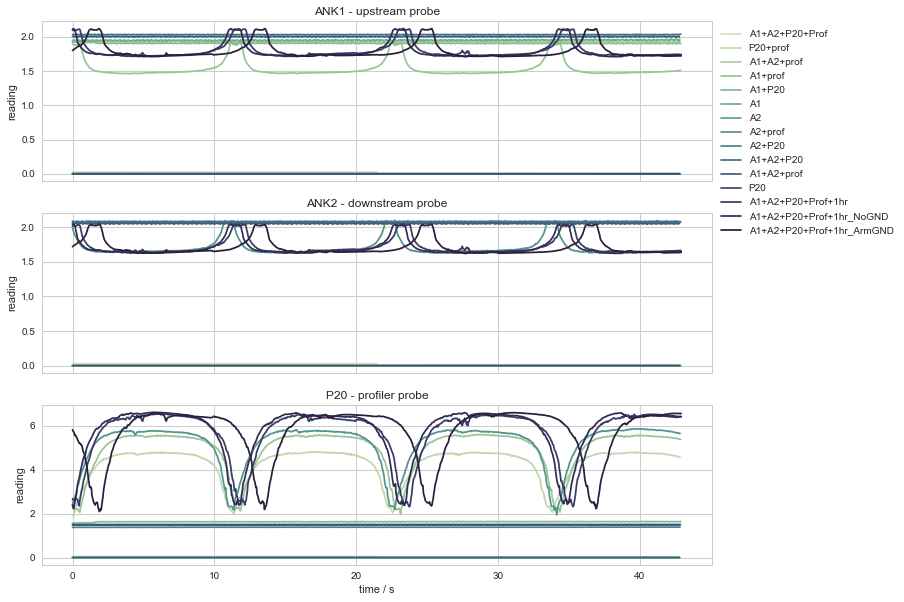

In [11]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharex=True)

labels = ['A1+A2+P20+Prof','P20+prof', 'A1+A2+prof','A1+prof','A1+P20', 
          'A1', 'A2','A2+prof','A2+P20','A1+A2+P20','A1+A2+prof', 'P20',
          'A1+A2+P20+Prof+1hr','A1+A2+P20+Prof+1hr_NoGND','A1+A2+P20+Prof+1hr_ArmGND']

filepaths = ['../probe_interference_2/ANK1_ANK2_Profiler.mat',
             '../probe_interference_2/Profiler.mat',
             '../probe_interference_2/ANK1_ANK2.mat',
             '../probe_interference_2/ANK1_Profiler.mat',
             '../probe_interference_2/ANK1_P20.mat',
             '../probe_interference_2/ANK1.mat',
             '../probe_interference_2/ANK2.mat',
             '../probe_interference_2/ANK2_Profiler.mat',
             '../probe_interference_2/ANK2_P20.mat',
             '../probe_interference_2/ANK1_ANK2_P20.mat',
             '../probe_interference_2/ANK1_ANK2_noProfiler.mat',
             '../probe_interference_2/P20.mat',
             '../probe_interference_2/all_probes_and_profiler.mat',
             '../probe_interference_2/all_probes_and_profiler_noGround.mat',
             '../probe_interference_2/all_probes_and_profiler_armGround.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

### Base levels 
Runs without a profiler. What is the base reading of each probe when one or two of the other probes are connected? P20 may vary because the tip of the probe was sometimes a bit deeper than the surface.

Text(0.5,0,'time / s')

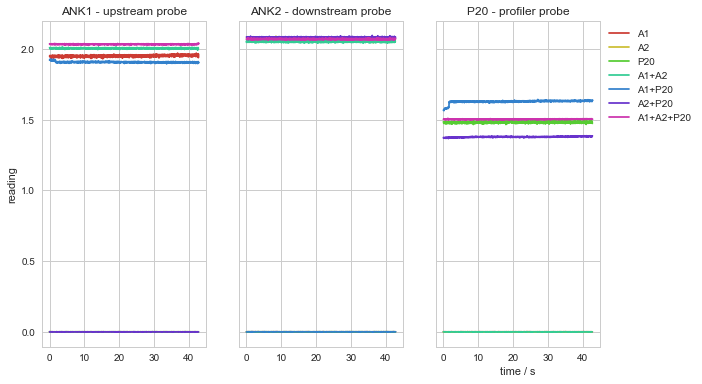

In [16]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(10,6), sharey=True)

labels = ['A1', 'A2','P20', 'A1+A2', 'A1+P20', 'A2+P20', 'A1+A2+P20']

filepaths = ['../probe_interference_2/ANK1.mat',
             '../probe_interference_2/ANK2.mat',
             '../probe_interference_2/P20.mat',
             '../probe_interference_2/ANK1_ANK2_noProfiler.mat',
             '../probe_interference_2/ANK1_P20.mat',
             '../probe_interference_2/ANK2_P20.mat',
             '../probe_interference_2/ANK1_ANK2_P20.mat',
             
            ]
sns.set_palette(sns.hls_palette(len(filepaths), l=.5, s=0.4))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

1.0 1.0274518643705117 0.9773466905980939 1.041971796890736
1.0 0.9913166094405812 1.0049161388288999 0.9999448607647323
1.0 1.098526370611541 0.9301478583694768 1.0142755568971031


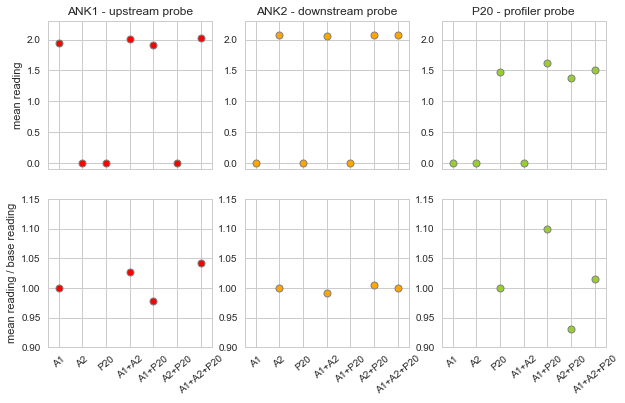

In [17]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3, figsize=(10,6), sharex=True)

labels = ['A1', 'A2','P20', 'A1+A2', 'A1+P20', 'A2+P20', 'A1+A2+P20']

filepaths = ['../probe_interference_2/ANK1.mat',
             '../probe_interference_2/ANK2.mat',
             '../probe_interference_2/P20.mat',
             '../probe_interference_2/ANK1_ANK2_noProfiler.mat',
             '../probe_interference_2/ANK1_P20.mat',
             '../probe_interference_2/ANK2_P20.mat',
             '../probe_interference_2/ANK1_ANK2_P20.mat',
             
            ]
P1_mean = np.zeros(len(filepaths))
P2_mean = np.zeros(len(filepaths))
P3_mean = np.zeros(len(filepaths))

for filepath, lab, ii in zip(filepaths, labels, range(len(filepaths))):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])
    P1_mean[ii] = np.nanmean(P1)
    P2_mean[ii] = np.nanmean(P2)
    P3_mean[ii] = np.nanmean(P3)
    
ax0.scatter(labels,P1_mean, c='red', edgecolors='0.5',linewidths=1)
ax1.scatter(labels,P2_mean, c='orange', edgecolors='0.5',linewidths=1)
ax2.scatter(labels,P3_mean, c='yellowgreen', edgecolors='0.5',linewidths=1)

ax3.scatter(labels,P1_mean/P1_mean[0], c='red', edgecolors='0.5',linewidths=1)
ax4.scatter(labels,P2_mean/P2_mean[1], c='orange', edgecolors='0.5',linewidths=1)
ax5.scatter(labels,P3_mean/P3_mean[2], c='yellowgreen', edgecolors='0.5',linewidths=1)

for ax in [ax3,ax4,ax5]:
    ax.tick_params(axis='x', rotation=40)
    ax.set_ylim(0.9,1.15)
for ax in [ax0,ax1,ax2]:
    ax.tick_params(axis='x', rotation=40)
    ax.set_ylim(-0.1,2.3)

ax0.set_ylabel('mean reading')
ax3.set_ylabel('mean reading / base reading')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

print(P1_mean[0]/P1_mean[0],P1_mean[3]/P1_mean[0],P1_mean[4]/P1_mean[0],P1_mean[6]/P1_mean[0])
print(P2_mean[1]/P2_mean[1],P2_mean[3]/P2_mean[1],P2_mean[5]/P2_mean[1],P2_mean[6]/P2_mean[1])
print(P3_mean[2]/P3_mean[2],P3_mean[4]/P3_mean[2],P3_mean[5]/P3_mean[2],P3_mean[6]/P3_mean[2])

#ax2.set_xlabel('time / s')

Base reading means the reading a probe gets when the other probes are not connected. For probe ANK1 it is the mean value of A1, for ANK2 it is the mean value of A2, and for the profiler probe P20 it is the mean value of P20.

The probe with higher disturbances from base reading is P20. It's reading goes up when connceted simultaneously with A1 and down when connected simultaneously with A2, however, when all three probes are connceted simultaneously the inetractions balance out and the reading is close to base reading (1.014 times base reading).

Reading of A1 goes up when connected simultaneously with A2 and down when connected simultaneously with P20. When all probes are connceted readings are higher than base reading (1.042 times base reading).

A2 is a very nicely behaved probe :) when connceted simultaneously with A1 and P2, its reading is essentiallythe same as the base reading (0.99994 times base reading).

### Profiles

Text(0.5,0,'time / s')

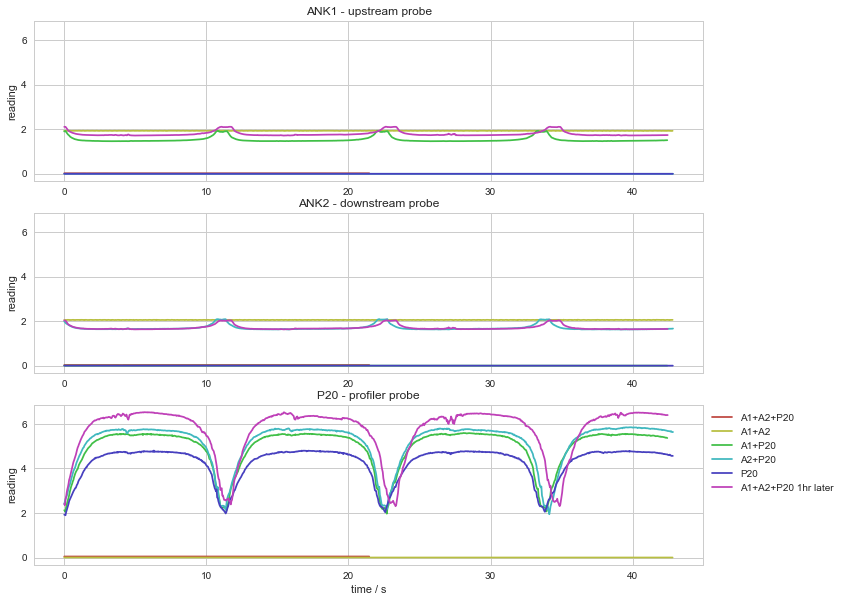

In [65]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharey=True)

labels = ['A1+A2+P20','A1+A2','A1+P20', 'A2+P20', 'P20', 'A1+A2+P20 1hr later']

filepaths = ['../probe_interference_2/ANK1_ANK2_Profiler.mat',
             '../probe_interference_2/ANK1_ANK2.mat',
             '../probe_interference_2/ANK1_Profiler.mat',
             '../probe_interference_2/ANK2_Profiler.mat',
             '../probe_interference_2/Profiler.mat',   
             '../probe_interference_2/all_probes_and_profiler.mat',
            ]
ini_indices = [0,0,10,0,0,10]
sns.set_palette(sns.hls_palette(len(filepaths), l=.5, s=0.5))
for filepath, lab, ind in zip(filepaths, labels, ini_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time[ind:]-time[ind],P1[ind:], label=lab)
    ax1.plot(time[ind:]-time[ind],P2[ind:], label=lab)
    ax2.plot(time[ind:]-time[ind],P3[ind:], label=lab)

ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')
ax2.set_ylabel('reading')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

Oops, something is wrong with the all probes + profiles run! (red line)

Profiles an hour after (purple) have higher base and max readings than all others. Pretty stable for ANK2.

The profile when ANK2 and P20 were connected is not larger from the profile when only P20 was connected. I expected it to be lower because readings in P20 in the profiler are lower than base reading in P20 when simultaneously connected with ANK2.

### Effect of grounding cable

Well, nothing happens if I stick a calbe into the water in the tank and tape it to the table's frame or filling arm.

Text(0.5,0,'time / s')

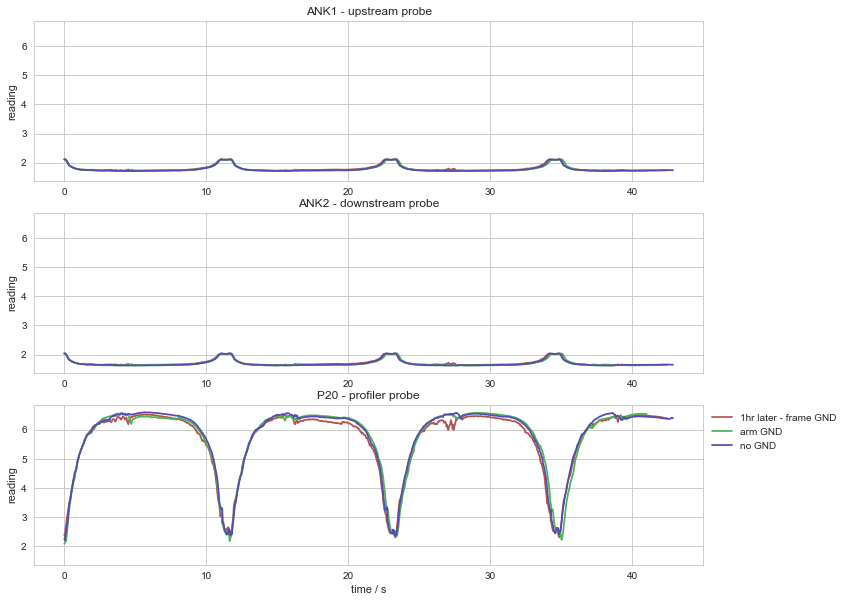

In [46]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(12,10), sharey=True)

labels = ['1hr later - frame GND','arm GND','no GND']

filepaths = [ '../probe_interference_2/all_probes_and_profiler.mat',
             '../probe_interference_2/all_probes_and_profiler_armGround.mat',
             '../probe_interference_2/all_probes_and_profiler_noGround.mat',
            ]

ini_indices = [10,44,1]
sns.set_palette(sns.hls_palette(3, l=.5, s=0.4))
for filepath, lab, ind in zip(filepaths, labels, ini_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    P3 = mat['ch3']#dens_C(mat['ch2'])

    time = mat['time']
    ax0.plot(time[ind:]-time[ind],P1[ind:], label=lab)
    ax1.plot(time[ind:]-time[ind],P2[ind:], label=lab)
    ax2.plot(time[ind:]-time[ind],P3[ind:], label=lab)

ax2.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('reading')
ax2.set_ylabel('reading')

ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')
ax2.set_xlabel('time / s')

### Appendix: How to convert profiler time to distance travelled?

In [180]:
tt = np.linspace(0,40,100)
H = -9.5 # cm
A = H/2 
B = H/2 
omega = 0.545
dd = A*np.sin(omega*tt-np.pi/2)+B

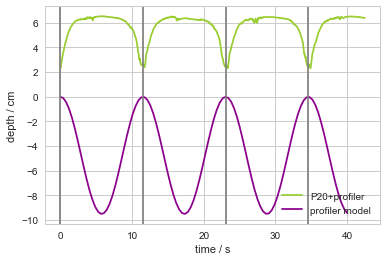

In [181]:
ind=10
fig,ax = plt.subplots(1,1,figsize=(6,4))

file = '../probe_interference_2/Profiler.mat'
mat = sio.loadmat(filepath, squeeze_me=True)
P3 = mat['ch3']#dens_C(mat['ch2'])
time = mat['time']

ax.plot(time[ind:]-time[ind],P3[ind:], label='P20+profiler', color='yellowgreen')
ax.plot(tt,dd, label='profiler model', color='darkmagenta')
ax.legend()
ax.set_xlabel('time / s')
ax.set_ylabel('depth / cm')

ax.axvline((0*np.pi)/omega, color='0.5')
ax.axvline((2*np.pi)/omega, color='0.5')
ax.axvline((4*np.pi)/omega, color='0.5')
ax.axvline((6*np.pi)/omega, color='0.5')

In [185]:
def time_to_dist(time, tot_dep=9.5, omega=0.545, offset=0):
    '''default values: 
    omega = 0.545
    tot_dep = 9.5 cm, total depth the probe travels from surface to bottom
    offset = 0 s, we want to start at the top of the probe cycle'''
    tt = time-offset
    tot_dep = -9.5 # cm
    A = tot_dep/2 
    B = tot_dep/2 
    omega = 0.545
    dist = A*np.sin(omega*tt-np.pi/2)+B
    return tt, dist

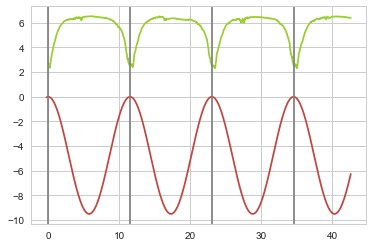

In [199]:
ind = 6
time_prof, dist_prof = time_to_dist(time, offset=time[ind])

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(time_prof, dist_prof)
ax.plot(time[ind:]-time[ind],P3[ind:], label='P20+profiler', color='yellowgreen')
ax.axvline((0*np.pi)/omega, color='0.5')
ax.axvline((2*np.pi)/omega, color='0.5')
ax.axvline((4*np.pi)/omega, color='0.5')
ax.axvline((6*np.pi)/omega, color='0.5')

Text(0,0.5,'depth / cm')

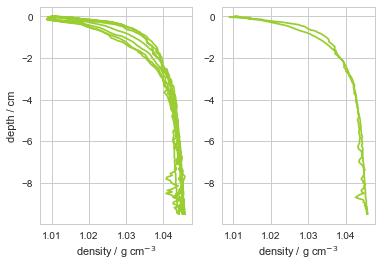

In [203]:
fig,ax = plt.subplots(1,2,figsize=(6,4))

ax[0].plot(densP(P3[ind:]),dist_prof[ind:], label='P20+profiler', color='yellowgreen')
ax[1].plot(densP(P3[ind:279]),dist_prof[ind:279], label='P20+profiler', color='yellowgreen')

ax[0].set_xlabel('density / g cm$^{-3}$')
ax[1].set_xlabel('density / g cm$^{-3}$')
ax[0].set_ylabel('depth / cm')
